# Figure 1B - Cohort overview 

- Authors: DF, CW
- files needed: Supplementary_Table_1.csv
- Last updated: 04/08/2024

In [2]:
library('Seurat')
library('dplyr')
library('tidyr')
library('ggplot2')
library('Matrix')
library(tibble)
library(SeuratDisk)
library('RColorBrewer')
library(dplyr)

Attaching SeuratObject

‘SeuratObject’ was built with package ‘Matrix’ 1.6.4 but the current
version is 1.6.5; it is recomended that you reinstall ‘SeuratObject’ as
the ABI for ‘Matrix’ may have changed

Seurat v4 was just loaded with SeuratObject v5; disabling v5 assays and
validation routines, and ensuring assays work in strict v3/v4
compatibility mode


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Registered S3 method overwritten by 'SeuratDisk':
  method            from  
  as.sparse.H5Group Seurat



In [3]:
sessionInfo()

R version 4.2.3 (2023-03-15)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /net/bmc-lab5/data/kellis/users/cbw3/conda/envs/r-kernel/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] RColorBrewer_1.1-3    SeuratDisk_0.0.0.9020 tibble_3.2.1         
[4] Matrix_1.6-5          ggplot2_3.5.0         tidyr_1.3.1          
[7] dplyr_1.1.4           SeuratObject_5.0.1    Seurat_4.3.0.1       

loaded via a namespace (and not attached):
  [1] Rtsne_0.17          

In [3]:
# load sample metadata table
# replace path to file
sample.metadata <- read.csv('/path_to_file/Supplementary_Table_1.csv', 
                           row.names = 'X')

In [4]:
sample.metadata

,sample_ID_long,patient,uid,age,sex,subtype,sample_date,treatment,treatment_group,adjuvant,⋯,day_to_treatment,overall_response,response_short,with_ICI,ICI_only,mDC_out_of_cDC,is_mDC_high,mDC_status,patient_sample,ATAC_sample_ID
,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,⋯,<int>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,<chr>
1,D18-11807,946,94610/24/2018,85,M,cutaneous,10/24/18,"ERKi (prior pembro, PDL1+CSF1Ri)",targeted,FALSE,⋯,-112,PR,R,no,no,0.00000000,0,low,946_1,none
2,D18-11808,926,92611/01/2018,62,M,cutaneous,11/1/18,pembro,ICI_PD1,FALSE,⋯,22,PD,NR,yes,yes,0.18478261,0,low,926_1,none
3,D18-11809,406,40611/05/2018,70,M,cutaneous,11/5/18,"pembro (prior TVEC, d+t, IFN)",ICI_PD1,FALSE,⋯,-3,PD,NR,yes,yes,0.16438356,0,low,406_3,none
4,D19-11960,1224,122408/29/2019,79,M,cutaneous,8/29/19,pembro,ICI_PD1,FALSE,⋯,71,PD,NR,yes,yes,0.00000000,0,low,1224_3,D19-11983 D19-11984
5,D19-11962,1098,109809/16/2019,24,F,cutaneous,9/16/19,"enco+Bini (+ NIVO, prior IPI+NIVO, enco+bini)",targeted_plus_ICI,FALSE,⋯,19,R,R,yes,no,0.20833333,1,high,1098_5,none
6,D19-11963,1232,123209/13/2019,79,F,mucosal,9/13/19,pembro +PCV,other_plus_ICI,FALSE,⋯,-47,R,R,yes,no,0.02702703,0,low,1232_1,none
7,D19-11964,1037,103709/12/2019,71,M,uveal,9/12/19,pembro,ICI_PD1,FALSE,⋯,182,PD,NR,yes,yes,0.12500000,0,low,1037_1,none
8,D19-11965,854,85409/16/2019,63,F,uveal,9/16/19,IPI+NIVO,ICI_combo,FALSE,⋯,-10,PD,NR,yes,yes,0.04878049,0,low,854_1,none
9,D19-11966,1227,122709/16/2019,68,F,cutaneous,9/16/19,"pembro (prior IPI, adj NIVO)",ICI_PD1,FALSE,⋯,-11,R,R,yes,yes,0.30693069,1,high,1227_1,D19-11972


In [5]:
#arrange columns
sample.metadata <- sample.metadata %>% arrange(factor(treatment_group, levels = c("ICI_combo", "ICI_PD1", "other_plus_ICI",
                                                                 "targeted_plus_ICI", "other", "targeted")), 
                               factor(subtype, levels = c("cutaneous", "mucosal", "uveal", "acral", "unkwnown")))

In [6]:
#rename column names
colnames(sample.metadata)[colnames(sample.metadata) == 'response_short'] <- 'response'
colnames(sample.metadata)[colnames(sample.metadata) == 'state'] <- 'treatment_state'
colnames(sample.metadata)[colnames(sample.metadata) == 'subtype'] <- 'disease_subtype'

In [7]:
anno_col = list( 
     #add more colors to treatment group
    treatment_group = c( ICI_combo = "#00B050",  ICI_PD1 = "#3C76AF", other_plus_ICI = '#B2E08A',
                        targeted_plus_ICI = "#A6CEE4", other = "#FB9B9A",
                         targeted = "#FEBF6F"),
    
    pfs = colorRampPalette(brewer.pal(9, "Purples")) (255),
    
    os = colorRampPalette(brewer.pal(9, "Oranges")) (255),
    
    response = c(NR = "#FA7F72", R = "#90EF91"),
    
    treatment_state = c(PRE = 'palegoldenrod', ON ='gold1', POST ='sandybrown'),
    
        
    tissue = c(skin = 'lightskyblue1', breast = 'darkolivegreen3', liver = 'seagreen1',
                  lymph = 'lightseagreen', brain = 'cyan', soft = 'steelblue1', colon = 'darkcyan',
                 bone = 'seagreen3', perispinal= 'green'),
    
    disease_subtype = c(cutaneous = '#00B050', mucosal = 'mistyrose2',
                 uveal = 'lightgoldenrodyellow', acral = 'lightblue', unknown = 'gray95'),
            
    sex = c(M = 'lightblue2', F = 'mistyrose'), 

    age = colorRampPalette(brewer.pal(4, "Blues")) (40),
    
    day_to_treatment = colorRampPalette(brewer.pal(6, "RdPu")) (40),
    
    scRNA = c(yes = "black"),
    
    snATAC = c(yes = "black", no = 'white'))

In [8]:
filtered.metadata <- sample.metadata %>%
            select(rev(c("patient_sample", "treatment_group", "pfs", "os", "response","treatment_state",
                     "tissue", "disease_subtype",'sex', "age", "day_to_treatment",
                                 "scRNA", "snATAC")))


In [9]:
rownames(filtered.metadata) <- filtered.metadata$patient_sample

In [10]:
## Cohort overview
library(pheatmap)
#library(Matrix.utils)

In [11]:
pfs_mat <- as.matrix(filtered.metadata[c('pfs')])

In [12]:
t(pfs_mat)

,1098_3,620_2,1087_1,854_1,926_1,406_3,1224_3,1227_1,509_2,509_1,⋯,1098_1,1098_2,1224_1,1224_2,667_1,978_1,1138_1,946_1,406_2,808_1
pfs,42,446,42,108,92,67,54,529,1126,1126,⋯,110,110,110,110,141,30,131,120,152,36


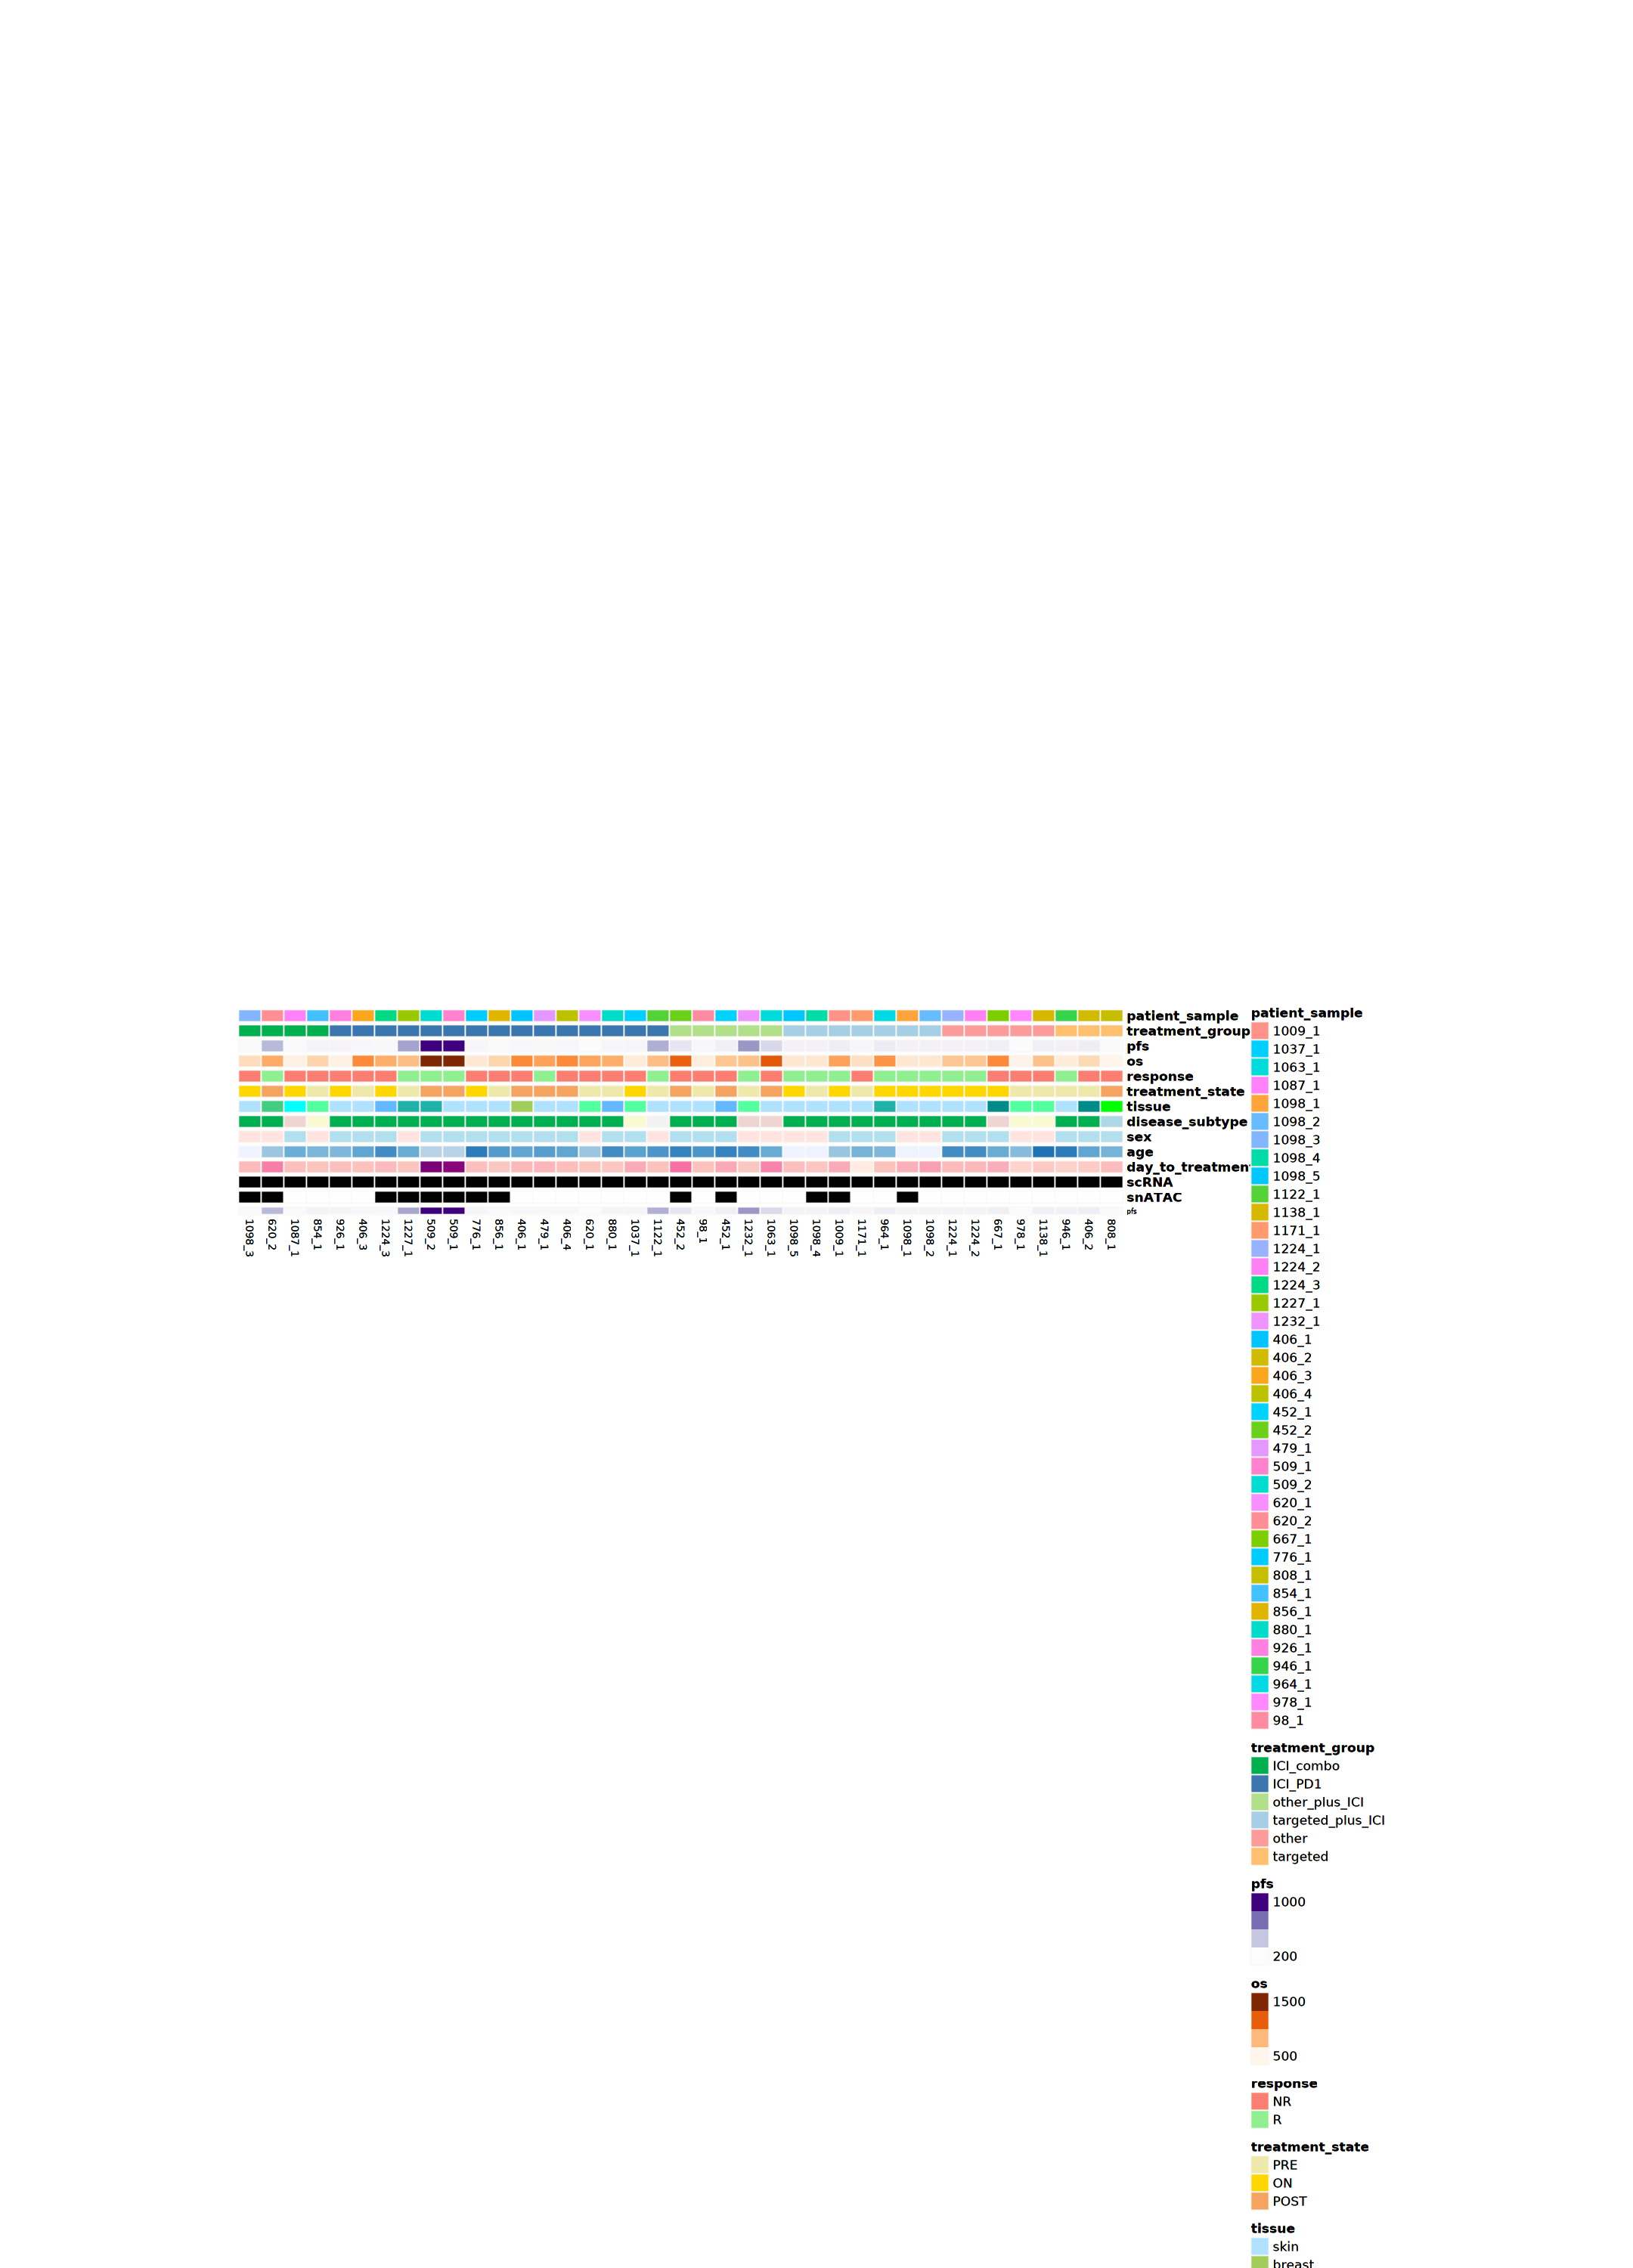

In [13]:
options(repr.plot.height = 25, repr.plot.width = 18)

p <- pheatmap(t(pfs_mat), 
            color = colorRampPalette(brewer.pal(9, "Purples")) (255), 
             annotation_colors =anno_col, 
             cluster_rows = F,
             cluster_cols = F,
             show_rownames = T,
             annotation_col = filtered.metadata, 
             #fontsize = 10, 
             fontsize_row = 5,
         fontsize_col = 8,
         cellheight = 6, 
         cellwidth = 18,
         height = 9, 
         width = 11, 
         border_color = '#FAF9F6',
         legend = FALSE
          #filename = "F1A_scRNA_cohort_overview.pdf"
         )

print(p)

In [23]:
save_pheatmap_pdf <- function(x, filename, width=7, height=9) {
    stopifnot(!missing(x))
    stopifnot(!missing(filename))
    pdf(filename, width=width, height=height)
grid::grid.newpage()
grid::grid.draw(x$gtable)
    dev.off()
}

In [24]:
save_pheatmap_pdf(p, "/F1A_scRNA_cohort_overview.pdf", 
                 width=900/72,height=1700/72)

png 
  2